In [14]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import nltk
nltk.download("punkt")
# from nltk.stem.porter import PorterStemmer


df = pd.read_csv('MM Data - PartnersWithLatLong.csv')
df.sample(1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lilyx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Submitted on,Email address,Phone,Name,Last name,City,Stateprovince,Country,Date Last Contacted,By,Outcome,I am interested in,Comment,Unnamed: 13,ZIP,Full Address,Timezone,Donations,Donation Date,Donation Source,Source,Company,Subscribed,Emails sent,Opened,Clicked,LatLong,Lat,Long
4,01/27/2018 15:51:52,laura.close@rocketmail.com,NaN,Laura,Close,San Francisco,Ca,USA,NaN,NaN,NaN,"Partnering, Something else",Hi! I saw your presentation at Impact Hub last...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-28 0:06:46,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031


In [24]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

df['Comment'] = df['Comment'].astype(str)
# Remove extra white space
df['Comment_Clean'] = df['Comment'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
df['Comment_Clean'] = df['Comment_Clean'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
df['Comment_Clean'] = df['Comment_Clean'].str.lower()

# Lemmatize
df['Comment_Clean'] = df['Comment_Clean'].map(lambda x: lemmatize(x))

In [25]:
df.head(4)

,Submitted on,Email address,Phone,Name,Last name,City,Stateprovince,Country,Date Last Contacted,By,Outcome,I am interested in,Comment,Unnamed: 13,ZIP,Full Address,Timezone,Donations,Donation Date,Donation Source,Source,Company,Subscribed,Emails sent,Opened,Clicked,LatLong,Lat,Long,Comment_Clean
0,2016-04-26 16:17:17,jeff@charitees.org,NaN,NaN,NaN,Boca Raton,FL,USA,NaN,NaN,NaN,Partnering,Hi Mark... Thanks for this great project.Would...,1.0,NaN,Boca Raton PA USA,America/New_York,NaN,NaN,NaN,NaN,NaN,2017-12-07 7:54:11,2.0,0.0,0.0,NaN,NaN,NaN,hi mark thanks for this great project would li...
1,2018-02-06 7:56:04,patti.harris@camdencounty.com,NaN,Patti,Harris,Camden,New Jersey,USA,NaN,NaN,NaN,Partnering,our Homelessness Initiative Team would love to...,1.0,NaN,NaN,America/New_York,NaN,NaN,NaN,NaN,NaN,2018-02-06 16:09:12,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031,our homelessness initiative team would love to...
2,02/26/2017 18:48:58,nicolezaborsky@charter.net,NaN,Nicole,Zaborsky,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I am a board member of the South Lake Tahoe Co...,1.0,NaN,"South Lake Tahoe, CA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(38.9332411, -119.9843482, 0.0)",38.933241,-119.984348,i am a board member of the south lake tahoe co...
3,03/30/2017 10:22:44,jlbaker@nnva.gov,NaN,Jill,Baker,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I oversee our Homeless program in a local Dept...,1.0,NaN,"Newport News, VA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(36.9786449, -76.4321089, 0.0)",36.978645,-76.432109,i oversee our homeless program in a local dept...


In [26]:
player = 'laura.close@rocketmail.com'
print('Original Text: \n{}\n'.format(list(df[df['Email address'] == player]['Comment'])))
print('After Cleaning: \n{}'.format(list(df[df['Email address'] == player]['Comment_Clean'])))

Original Text: 
["Hi! I saw your presentation at Impact Hub last Thursday and am very interested in partnering Up! I currently work as a case manager in supportive housing for formerly homeless adults in SRO's  in San Francisco. I have some client's who may be interested i"]

After Cleaning: 
['hi i saw your presentation at impact hub last thursday and am very interested in partnering up i currently work a a case manager in supportive housing for formerly homeless adult in sro s in san francisco i have some client s who may be interested i']


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['nan','love','like', 'would like', 'i','we','am', 'be', 'in','have', 'would','wa','one','year','hi','get','ha','hello','also','see','need','thank','saw','please','people','county','city','could','area','miracle','message','non','know','one','great','really','amazing','may','let'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(df['Comment_Clean'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (689, 441)


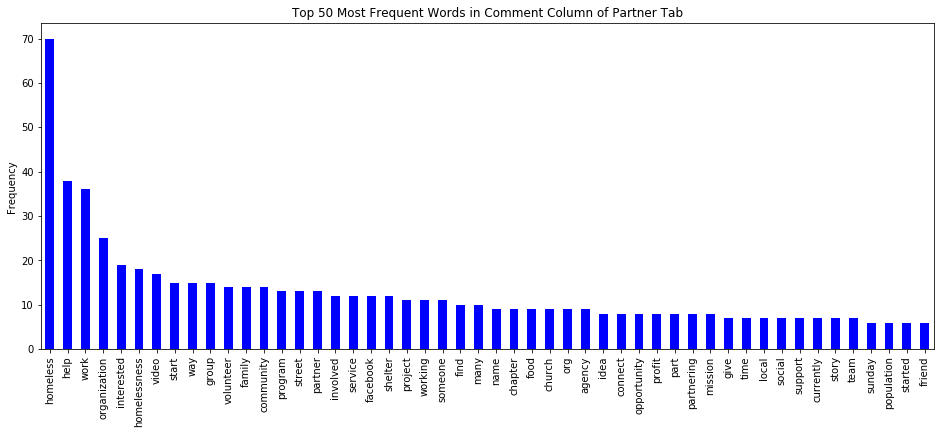

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Comment Column of Partner Tab")
plt.ylabel("Frequency")
plt.show()